In [106]:
# Import required libraries

# Reading Dataset
import pandas as pd

# Calculations
import numpy as np

# Graphing
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
# plt.rcParams['figure.figsize'] = [10.0, 15.0]
# plt.rcParams['figure.dpi'] = 150

# Regression
from sklearn.model_selection import train_test_split as tts
from scipy.optimize import curve_fit

In [107]:
dataset = pd.read_csv("GDP_dataset.csv")
dataset[:] = dataset[:].astype(float)

# Independent Variables
ind_names = dataset.keys()[2:]

# Dependent Variable
dep_name = dataset.keys()[1]

# Train Test Data
train_size = 0.7
headers = ["Year"] + list(ind_names)
data_train, data_test, Y_train, Y_test = tts(dataset[headers], dataset[dep_name], train_size=train_size)

# Initial Regression coefficients
coeff = np.ones(len(ind_names))

# Regression Curve
def regression(X, *C):
    """
    Regression curve
    """
    print(C)
    C = np.array(C)
    C = C.reshape([len(ind_names), 1])

    return np.array(X).dot(C)

In [108]:
corelation = dataset.corr()["GDP"][2:]
print("Spearman corelation of Dependent ({:s}) vs Independent Variables".format(dep_name))
corelation

Spearman corelation of Dependent (GDP) vs Independent Variables


Imports                   0.982253
Trade                     0.724416
Net income from abroad   -0.942431
Inflation                -0.400447
Tax revenue               0.995443
FDI                       0.718257
CO2 emissions             0.955332
International Taxes       0.844302
Name: GDP, dtype: float64

(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0)


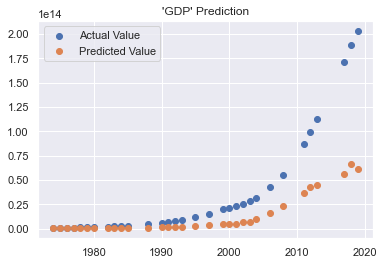

In [109]:
plt.title("'{:s}' Prediction".format(dep_name))
plt.scatter(data_train["Year"], Y_train, label="Actual Value")
plt.scatter(data_train["Year"], regression(data_train[ind_names], *coeff), label="Predicted Value")
plt.legend(loc=0)

coeff, _ = curve_fit(regression, data_train[ind_names], Y_train, p0=coeff)

In [110]:
from sklearn.linear_model import LinearRegression

In [111]:
regr = LinearRegression()

In [112]:
fitt=regr.fit(data_train[ind_names], Y_train)

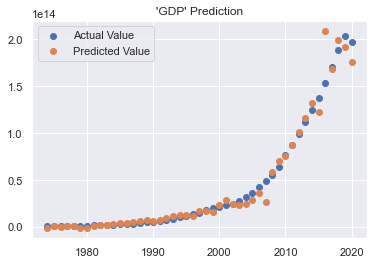

In [113]:
plt.title("'{:s}' Prediction".format(dep_name))
plt.scatter(dataset["Year"], dataset["GDP"], label="Actual Value")
plt.scatter(dataset["Year"], fitt.predict(dataset[ind_names]), label="Predicted Value")
plt.legend(loc=0)

In [114]:
fitt.score(dataset[ind_names], dataset[dep_name])

0.970125608220949

In [115]:
help(regr)

Help on LinearRegression in module sklearn.linear_model._base object:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |   